In [1]:
import os

import pandas as pd
from pandas import DataFrame
import numpy as np
from pandas.tseries.offsets import BDay
from datetime import datetime



# READ

In [2]:
daily_csv_loc = 'C:\\0_WORK\\HAQ_MLAAS\\project\\daily_volve_production_data.csv' 
df: DataFrame = pd.read_csv(daily_csv_loc)
# df: DataFrame = pd.read_csv(daily_csv_loc, parse_dates=True, index_col="dateprd") 


# PROCESS DATA


## Time related processes
- turn DATEPRD into datetime
- make it an index
- make unix out of index
- make cyclical values

In [3]:
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'], format='%d-%b-%y')
df = df.set_index('DATEPRD')



In [4]:
df.head()

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.000,0.000,...,%,0.000,0.00,0.000,0,0,0,NaN,production,WI
2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,%,0.000,0.00,0.000,0,0,0,NaN,production,OP
2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.376,96.876,...,%,33.098,10.48,33.072,0,0,0,NaN,production,OP


## ADD SIN&COS FOR  WEEK, MONTH, QTR, YEAR


In [5]:
DAY = 60*60*24          # Seconds in a day.
WEEK = DAY*7            # Seconds in a week.
MONTH = DAY*31          # Max seconds in a month.
QTR = DAY*(365.2425/4)    # Max seconds in a quarter. 
YEAR = DAY*365.2425          # Max seconds in a year.

col_amt_before_sin = df.shape[1]

    # Convert datetime TO UNIX  and put into a new column.
df['unix'] = df.index.astype(np.int64) // 10**9 
    # Make cyclical time values
df['WEEK_SIN']  = np.sin(df['unix'] * (2 * np.pi / WEEK))
df['WEEK_COS']  = np.cos(df['unix'] * (2 * np.pi / WEEK))
df['MTH_SIN'] = np.sin(df['unix'] * (2 * np.pi / MONTH))
df['MTH_COS'] = np.cos(df['unix'] * (2 * np.pi / MONTH))
df['QTR_SIN']   = np.sin(df['unix'] * (2 * np.pi / QTR))
df['QTR_COS']   = np.cos(df['unix'] * (2 * np.pi / QTR))
df['YR_SIN']  = np.sin(df['unix'] * (2 * np.pi / YEAR))
df['YR_COS']  = np.cos(df['unix'] * (2 * np.pi / YEAR))

col_amt_after_sin = df.shape[1]
sin_cos_col_amt = col_amt_after_sin - col_amt_before_sin - 1 # AMOUNT OF SIN / COS COLS

# DATA EXPLORATION

### Basics:

In [6]:
df.head()

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,WELL_TYPE,unix,WEEK_SIN,WEEK_COS,MTH_SIN,MTH_COS,QTR_SIN,QTR_COS,YR_SIN,YR_COS
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.000,0.000,...,WI,1396828800,-4.338837e-01,-0.900969,-0.101168,-0.994869,0.338563,0.940944,0.996274,-0.086240
2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,OP,1396915200,-9.749279e-01,-0.222521,-0.299363,-0.954139,0.402458,0.915439,0.994643,-0.103365
2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,OP,1397001600,-7.818315e-01,0.623490,-0.485302,-0.874347,0.464448,0.885600,0.992718,-0.120460
2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,...,OP,1397088000,-2.389372e-13,1.000000,-0.651372,-0.758758,0.524240,0.851571,0.990499,-0.137518
2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.376,96.876,...,OP,1397174400,7.818315e-01,0.623490,-0.790776,-0.612106,0.581550,0.813510,0.987987,-0.154536


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15634 entries, 2014-04-07 to 2016-09-18
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   NPD_FIELD_CODE            15634 non-null  int64  
 4   NPD_FIELD_NAME            15634 non-null  object 
 5   NPD_FACILITY_CODE         15634 non-null  int64  
 6   NPD_FACILITY_NAME         15634 non-null  object 
 7   ON_STREAM_HRS             15349 non-null  float64
 8   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 9   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 10  AVG_DP_TUBING             8980 non-null   float64
 11  AVG_ANNULUS_PRESS         7890 non-null   float64
 12  AVG_CHOKE_SIZE_P          8919 non-null   float64
 13  AVG_CHOKE_UOM             9161 non-null   ob

In [8]:
df.isnull().sum()

WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_CHOKE_UOM               6473
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
unix                           0
WEEK_SIN                       0
WEEK_COS                       0
MTH_SIN                        0
MTH_COS                        0
QTR_SIN                        0
QTR_COS                        0
YR_SIN    

In [9]:
df.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,...,DP_CHOKE_SIZE,unix,WEEK_SIN,WEEK_COS,MTH_SIN,MTH_COS,QTR_SIN,QTR_COS,YR_SIN,YR_COS
count,15634.000000,15634.0,15634.0,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,...,15340.000000,1.563400e+04,1.563400e+04,15634.000000,1.563400e+04,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000
mean,5908.581745,3420717.0,369304.0,19.994172,181.803870,77.162970,154.028791,14.856100,55.168534,45.377815,...,11.441063,1.352310e+09,1.293394e-03,-0.000263,1.477645e-03,0.001102,-0.003094,-0.004576,0.008592,-0.021668
std,649.231622,0.0,0.0,8.369911,109.712365,45.657949,76.752381,8.406821,36.692924,24.752635,...,19.816930,8.232348e+07,7.072364e-01,0.707021,7.070264e-01,0.707230,0.708170,0.706065,0.709102,0.704766
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.188605e+09,-9.749279e-01,-0.900969,-9.987165e-01,-0.994869,-1.000000,-0.999999,-0.999999,-1.000000
25%,5599.000000,3420717.0,369304.0,24.000000,0.000000,0.000000,83.665000,10.841250,18.952990,31.148000,...,0.000000,1.280448e+09,-7.818315e-01,-0.900969,-7.247928e-01,-0.758758,-0.712918,-0.709948,-0.701470,-0.723147
50%,5693.000000,3420717.0,369304.0,24.000000,232.897000,103.186500,175.589000,16.308500,52.096880,37.934000,...,2.385000,1.367971e+09,-1.095897e-13,-0.222521,-3.586632e-13,-0.050649,-0.006300,-0.005838,0.013353,-0.045260
75%,5769.000000,3420717.0,369304.0,24.000000,255.401250,106.277000,204.320000,21.306500,99.924290,57.101500,...,13.765250,1.424304e+09,7.818315e-01,0.623490,7.247928e-01,0.688967,0.706342,0.699775,0.720968,0.680354
max,7405.000000,3420717.0,369304.0,25.000000,397.589000,108.502000,345.907000,30.020000,100.000000,137.311000,...,125.719000,1.480550e+09,9.749279e-01,1.000000,9.987165e-01,1.000000,1.000000,1.000000,1.000000,1.000000


### Deeper exploration

In [10]:

# print(df['WELL_BORE_CODE'].unique())
well_codes = df['WELL_BORE_CODE'].unique()
print(well_codes)



['NO 15/9-F-1 C' 'NO 15/9-F-11 H' 'NO 15/9-F-12 H' 'NO 15/9-F-14 H'
 'NO 15/9-F-15 D' 'NO 15/9-F-4 AH' 'NO 15/9-F-5 AH']


In [11]:
# Null check

for col in df:
    print(col)
    for well in well_codes:
        null_indexes = df.index[(df[col].isnull()) & (df['WELL_BORE_CODE'] == well)].tolist()
        print(f"{len(null_indexes)} \t for well: {well}")
    print("")



WELL_BORE_CODE
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well: NO 15/9-F-15 D
0 	 for well: NO 15/9-F-4 AH
0 	 for well: NO 15/9-F-5 AH

NPD_WELL_BORE_CODE
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well: NO 15/9-F-15 D
0 	 for well: NO 15/9-F-4 AH
0 	 for well: NO 15/9-F-5 AH

NPD_WELL_BORE_NAME
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well: NO 15/9-F-15 D
0 	 for well: NO 15/9-F-4 AH
0 	 for well: NO 15/9-F-5 AH

NPD_FIELD_CODE
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well: NO 15/9-F-15 D
0 	 for well: NO 15/9-F-4 AH
0 	 for well: NO 15/9-F-5 AH

NPD_FIELD_NAME
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15

0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well: NO 15/9-F-15 D
3327 	 for well: NO 15/9-F-4 AH
3146 	 for well: NO 15/9-F-5 AH

BORE_WI_VOL
746 	 for well: NO 15/9-F-1 C
1165 	 for well: NO 15/9-F-11 H
3056 	 for well: NO 15/9-F-12 H
3056 	 for well: NO 15/9-F-14 H
978 	 for well: NO 15/9-F-15 D
337 	 for well: NO 15/9-F-4 AH
590 	 for well: NO 15/9-F-5 AH

FLOW_KIND
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well: NO 15/9-F-15 D
0 	 for well: NO 15/9-F-4 AH
0 	 for well: NO 15/9-F-5 AH

WELL_TYPE
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well: NO 15/9-F-15 D
0 	 for well: NO 15/9-F-4 AH
0 	 for well: NO 15/9-F-5 AH

unix
0 	 for well: NO 15/9-F-1 C
0 	 for well: NO 15/9-F-11 H
0 	 for well: NO 15/9-F-12 H
0 	 for well: NO 15/9-F-14 H
0 	 for well:

## PLOT TEMP AND PRESS 
## PER WELL

In [12]:
import matplotlib.pyplot as plt

Plotting well NO 15/9-F-1 C
Plotting well NO 15/9-F-11 H
Plotting well NO 15/9-F-12 H
Plotting well NO 15/9-F-14 H
Plotting well NO 15/9-F-15 D
Plotting well NO 15/9-F-4 AH
Plotting well NO 15/9-F-5 AH


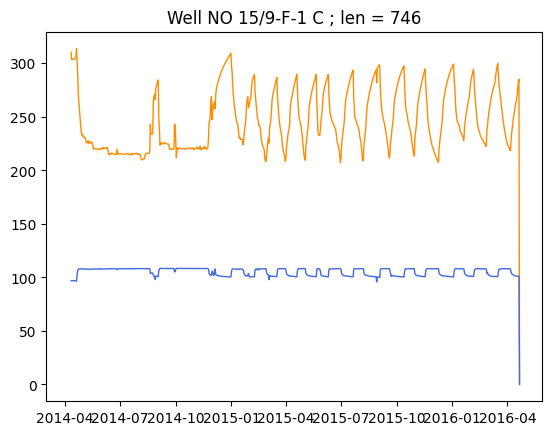

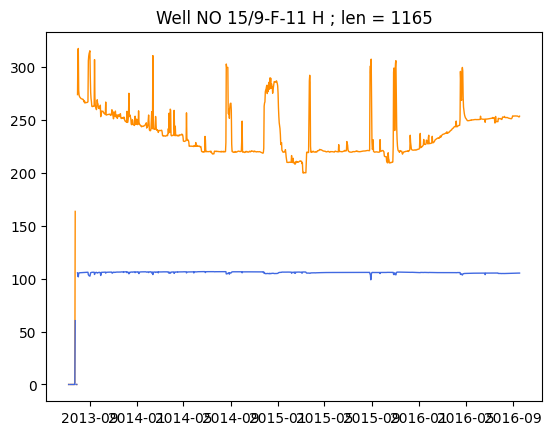

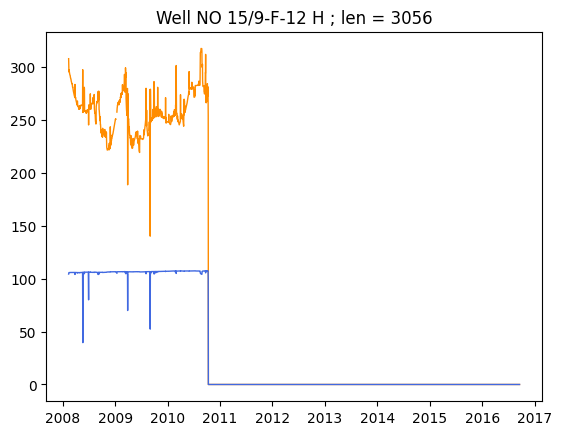

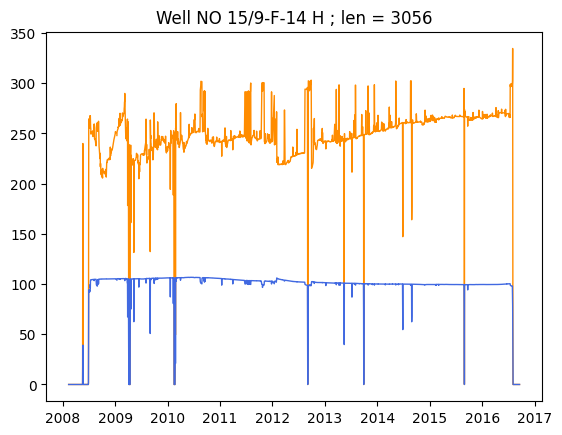

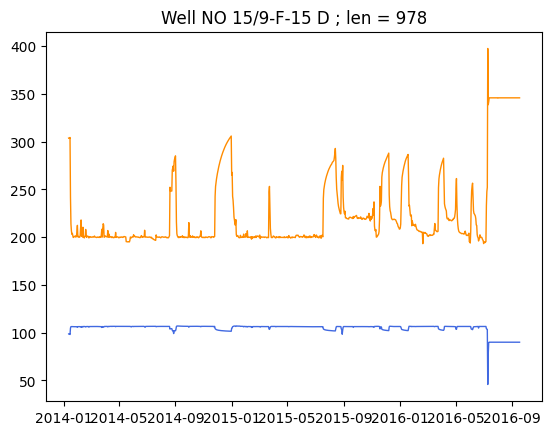

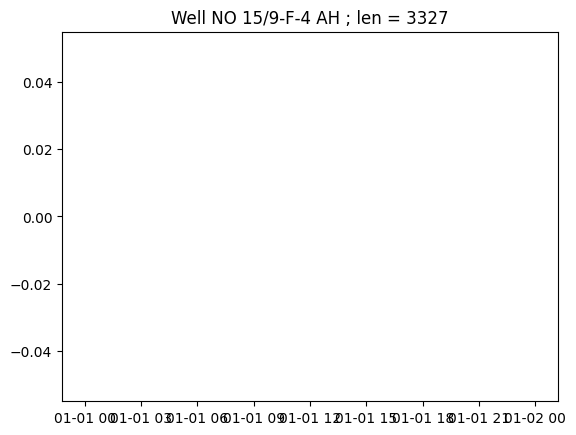

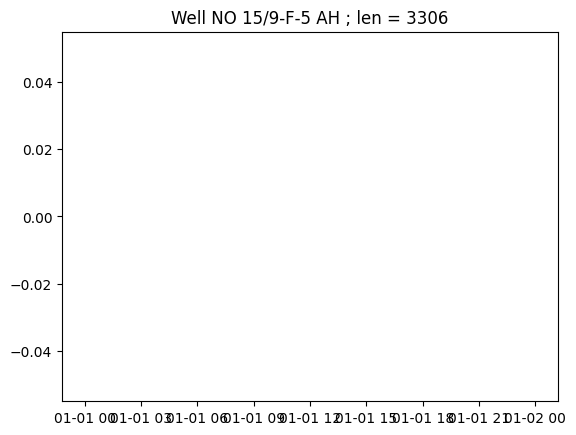

In [13]:

pl_col1 = 'AVG_DOWNHOLE_PRESSURE'
pl_col2 = 'AVG_DOWNHOLE_TEMPERATURE'
plot_start = 0
plot_end = len(df)
lw1   = 1
lw2   = 1

for well in well_codes:
    print(f"Plotting well {well}")
    fig, ax = plt.subplots(1)
    altered_df = df[df['WELL_BORE_CODE'] == well]
    df_plot = pd.DataFrame(data={'press':altered_df[pl_col1], 'temp':altered_df[pl_col2]})
    ax.plot(df_plot['press'][plot_start : plot_end], color='darkorange', linewidth=lw1)
    ax.plot(df_plot['temp'] [plot_start : plot_end], color='royalblue',  linewidth=lw2)
    ax.set_title(f"Well {well} ; len = {len(altered_df)}")


### Therefore, choosing well;
# 'NO 15/9-F-1 C'

In [14]:

well_name = 'NO 15/9-F-1 C'
well_df = df[df['WELL_BORE_CODE'] == well_name]
for col in well_df: 
    print(col)
print(len(well_df.index))

WELL_BORE_CODE
NPD_WELL_BORE_CODE
NPD_WELL_BORE_NAME
NPD_FIELD_CODE
NPD_FIELD_NAME
NPD_FACILITY_CODE
NPD_FACILITY_NAME
ON_STREAM_HRS
AVG_DOWNHOLE_PRESSURE
AVG_DOWNHOLE_TEMPERATURE
AVG_DP_TUBING
AVG_ANNULUS_PRESS
AVG_CHOKE_SIZE_P
AVG_CHOKE_UOM
AVG_WHP_P
AVG_WHT_P
DP_CHOKE_SIZE
BORE_OIL_VOL
BORE_GAS_VOL
BORE_WAT_VOL
BORE_WI_VOL
FLOW_KIND
WELL_TYPE
unix
WEEK_SIN
WEEK_COS
MTH_SIN
MTH_COS
QTR_SIN
QTR_COS
YR_SIN
YR_COS
746


In [15]:
wanted_cols = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 
               'WEEK_SIN', 'WEEK_COS', 'MTH_SIN', 'MTH_COS', 'QTR_SIN', 'QTR_COS', 'YR_SIN', 'YR_COS']

well_df = well_df[wanted_cols]

for col in well_df: 
    print(col)
print(f"\n=> {len(well_df.index)} rows by {len(wanted_cols)} cols" )



AVG_DOWNHOLE_PRESSURE
AVG_DOWNHOLE_TEMPERATURE
AVG_DP_TUBING
AVG_CHOKE_SIZE_P
AVG_WHP_P
AVG_WHT_P
DP_CHOKE_SIZE
BORE_OIL_VOL
BORE_GAS_VOL
BORE_WAT_VOL
WEEK_SIN
WEEK_COS
MTH_SIN
MTH_COS
QTR_SIN
QTR_COS
YR_SIN
YR_COS

=> 746 rows by 18 cols


## Scan the ds's columns for NANS, outliers, mistakes
### and take care of them


In [16]:
# NAN check

for col in well_df:
    print(col)
    null_indexes = well_df.index[(well_df[col].isnull())].tolist()
    print(f"{len(null_indexes)} out of {len(well_df.index)} \t for well: {well}")
    print(f"null_indexes = {null_indexes}")
    print("")


AVG_DOWNHOLE_PRESSURE
3 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = [Timestamp('2014-04-08 00:00:00'), Timestamp('2014-04-09 00:00:00'), Timestamp('2014-04-10 00:00:00')]

AVG_DOWNHOLE_TEMPERATURE
3 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = [Timestamp('2014-04-08 00:00:00'), Timestamp('2014-04-09 00:00:00'), Timestamp('2014-04-10 00:00:00')]

AVG_DP_TUBING
3 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = [Timestamp('2014-04-08 00:00:00'), Timestamp('2014-04-09 00:00:00'), Timestamp('2014-04-10 00:00:00')]

AVG_CHOKE_SIZE_P
0 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = []

AVG_WHP_P
0 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = []

AVG_WHT_P
0 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = []

DP_CHOKE_SIZE
0 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = []

BORE_OIL_VOL
0 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = []

BORE_GAS_VOL
0 out of 746 	 for well: NO 15/9-F-5 AH
null_indexes = []

BORE_WAT_VOL
0 out of 746 	 for

### Fixing NANs, outliers, mistakes

In [17]:
# Filling NAN's with next valid value
well_df = well_df.drop(index=well_df.index[[0, 1, 2, 3]], axis=0) # Manual deletion of FIRST problematic values
well_df = well_df[:-1]                                            # Manual deletion of LAST row. Becaue it's got problematic values
well_df = well_df.fillna(method='ffill')

### Fixing STRING number columns; turning them to numbers


In [18]:
# print(well_df['BORE_OIL_VOL'].to_string())
# print("===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ")
# print(well_df['BORE_GAS_VOL'].to_string())
# print("===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ")
# print(well_df['BORE_WAT_VOL'].to_string())


In [19]:


well_df['BORE_OIL_VOL'] = well_df['BORE_OIL_VOL'].str.replace(",", "")
well_df['BORE_GAS_VOL'] = well_df['BORE_GAS_VOL'].str.replace(",", "")
well_df['BORE_WAT_VOL'] = well_df['BORE_WAT_VOL'].str.replace(",", "")

well_df['BORE_OIL_VOL'] = pd.to_numeric(well_df['BORE_OIL_VOL'])
well_df['BORE_GAS_VOL'] = pd.to_numeric(well_df['BORE_GAS_VOL'])
well_df['BORE_WAT_VOL'] = pd.to_numeric(well_df['BORE_WAT_VOL'])


In [20]:

print(well_df['BORE_OIL_VOL'].to_string())
print("===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ")
print("===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ")
print(well_df['BORE_GAS_VOL'].to_string())
print("===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ")
print("===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ===   ")
print(well_df['BORE_WAT_VOL'].to_string())



DATEPRD
2014-04-11       0
2014-04-12       0
2014-04-13       0
2014-04-14       0
2014-04-15       0
2014-04-16       0
2014-04-17       0
2014-04-18       0
2014-04-19       0
2014-04-20       0
2014-04-21       0
2014-04-22     631
2014-04-23    1166
2014-04-24    1550
2014-04-25    1249
2014-04-26    1346
2014-04-27    1350
2014-04-28    1346
2014-04-29    1279
2014-04-30    1226
2014-05-01    1213
2014-05-02    1074
2014-05-03    1044
2014-05-04     970
2014-05-05     946
2014-05-06    1003
2014-05-07     925
2014-05-08     914
2014-05-09     177
2014-05-10     944
2014-05-11     823
2014-05-12     769
2014-05-13     741
2014-05-14     713
2014-05-15     744
2014-05-16     736
2014-05-17     783
2014-05-18     835
2014-05-19     789
2014-05-20     783
2014-05-21     744
2014-05-22     735
2014-05-23     743
2014-05-24     747
2014-05-25     751
2014-05-26     727
2014-05-27     716
2014-05-28     695
2014-05-29     699
2014-05-30     704
2014-05-31     716
2014-06-01     724
2014

## Plotting repaired df

In [21]:
well_df

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WEEK_SIN,WEEK_COS,MTH_SIN,MTH_COS,QTR_SIN,QTR_COS,YR_SIN,YR_COS
DATEPRD,,,,,,,,,,,,,,,,,,
2014-04-11,310.376,96.876,277.278,1.21599,33.098,10.480,33.072,0,0,0,0.781831,0.623490,-0.790776,-0.612106,0.581550,0.813510,0.987987,-0.154536
2014-04-12,303.501,96.923,281.447,3.08702,22.053,8.704,22.053,0,0,0,0.974928,-0.222521,-0.897805,-0.440394,0.636109,0.771600,0.985183,-0.171509
2014-04-13,303.535,96.959,276.032,1.96237,27.503,9.423,16.163,0,0,0,0.433884,-0.900969,-0.968077,-0.250653,0.687656,0.726037,0.982087,-0.188431
2014-04-14,303.782,96.969,282.787,0.00000,20.996,8.131,20.737,0,0,0,-0.433884,-0.900969,-0.998717,-0.050649,0.735948,0.677038,0.978700,-0.205296
2014-04-15,303.858,97.021,289.941,31.14186,13.918,8.498,12.182,0,0,0,-0.974928,-0.222521,-0.988468,0.151428,0.780758,0.624834,0.975024,-0.222102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-16,266.148,101.170,257.473,0.00000,8.675,10.079,0.068,0,0,0,0.974928,-0.222521,0.651372,-0.758758,0.841539,0.540196,0.968905,-0.247435
2016-04-17,270.268,101.198,263.770,0.00000,6.498,9.802,2.645,0,0,0,0.433884,-0.900969,0.485302,-0.874347,0.876690,0.481056,0.964505,-0.264065
2016-04-18,276.869,101.231,263.155,0.00000,13.714,11.742,4.120,0,0,0,-0.433884,-0.900969,0.299363,-0.954139,0.907691,0.419639,0.959820,-0.280617


In [22]:
well_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2014-04-11 to 2016-04-20
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AVG_DOWNHOLE_PRESSURE     741 non-null    float64
 1   AVG_DOWNHOLE_TEMPERATURE  741 non-null    float64
 2   AVG_DP_TUBING             741 non-null    float64
 3   AVG_CHOKE_SIZE_P          741 non-null    float64
 4   AVG_WHP_P                 741 non-null    float64
 5   AVG_WHT_P                 741 non-null    float64
 6   DP_CHOKE_SIZE             741 non-null    float64
 7   BORE_OIL_VOL              741 non-null    int64  
 8   BORE_GAS_VOL              741 non-null    int64  
 9   BORE_WAT_VOL              741 non-null    int64  
 10  WEEK_SIN                  741 non-null    float64
 11  WEEK_COS                  741 non-null    float64
 12  MTH_SIN                   741 non-null    float64
 13  MTH_COS                   741 non-null    floa

In [23]:
well_df.describe()

,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,WEEK_SIN,WEEK_COS,MTH_SIN,MTH_COS,QTR_SIN,QTR_COS,YR_SIN,YR_COS
count,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,741.000000,7.410000e+02,741.000000,7.410000e+02,741.000000,741.000000,741.000000,741.000000,741.000000
mean,247.331802,105.208502,193.059900,29.794760,54.271901,40.681707,32.867982,239.820513,35682.747638,279.763833,2.913249e-15,-0.001350,1.937972e-03,0.003492,0.011279,0.008100,0.013775,-0.003327
std,27.989949,3.444302,34.737646,25.456168,32.778244,25.991235,30.410005,275.966604,40183.858399,356.287713,7.080617e-01,0.707105,7.082981e-01,0.706859,0.708962,0.706067,0.711880,0.703120
min,207.219000,95.876000,152.926000,0.000000,0.000000,2.078000,0.000000,0.000000,0.000000,0.000000,-9.749279e-01,-0.900969,-9.987165e-01,-0.994869,-0.999999,-0.999993,-0.999996,-0.999987
25%,220.902000,101.291000,169.593000,0.026000,32.265000,11.299000,9.028000,0.000000,0.000000,0.000000,-7.818315e-01,-0.900969,-7.247928e-01,-0.758758,-0.697767,-0.699575,-0.698014,-0.697174
50%,240.736000,107.821000,182.852000,46.787730,43.292000,53.394000,17.937000,205.000000,31091.000000,79.000000,-1.154457e-13,-0.222521,-3.606152e-13,-0.050649,0.027392,0.024866,0.022211,-0.026392
75%,271.298000,108.140000,205.706000,51.286290,75.649000,62.426000,52.202000,385.000000,57125.000000,535.000000,7.818315e-01,0.623490,7.247928e-01,0.688967,0.721310,0.704582,0.729583,0.701002
max,313.871000,108.502000,305.976000,93.635430,133.593000,83.420000,115.639000,1550.000000,221707.000000,1645.000000,9.749279e-01,1.000000,9.987165e-01,1.000000,0.999999,0.999982,0.999993,0.999999


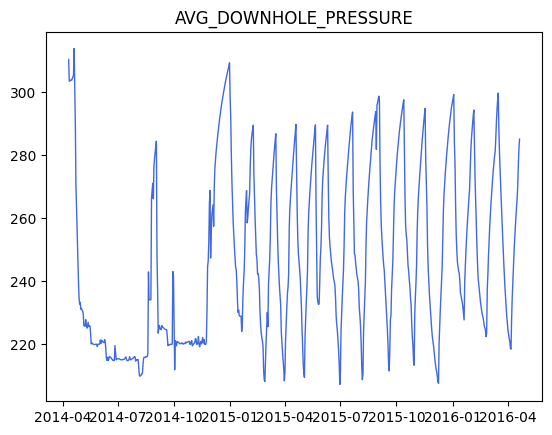

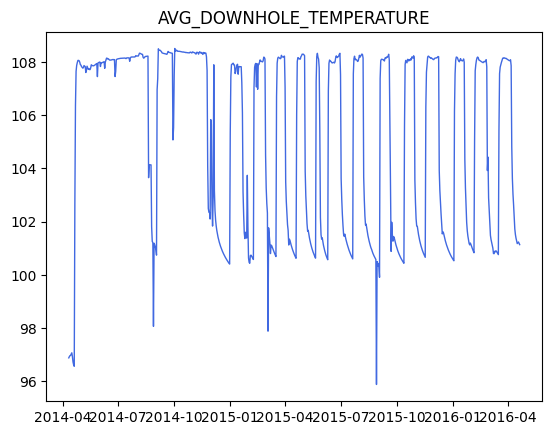

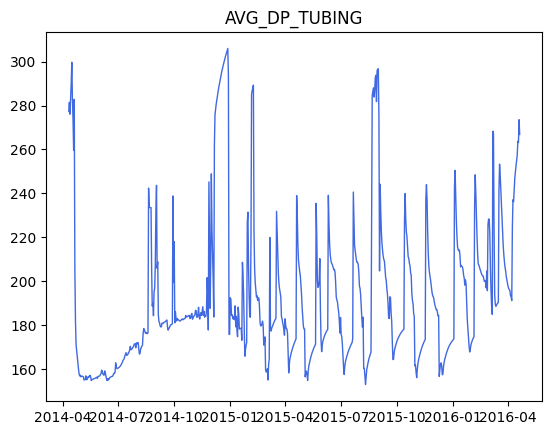

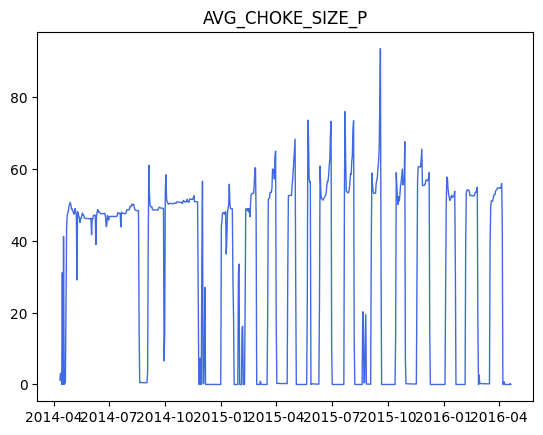

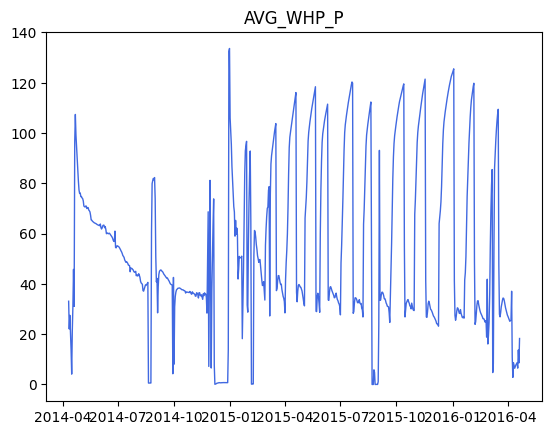

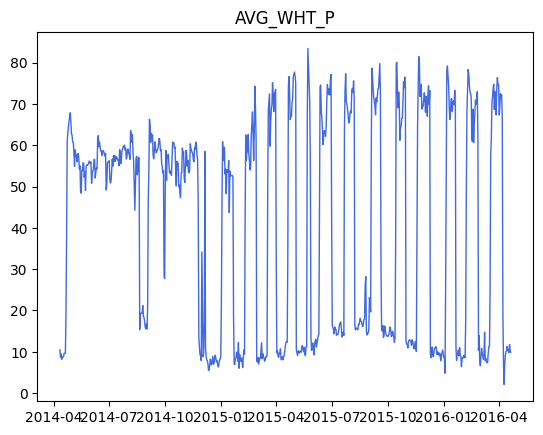

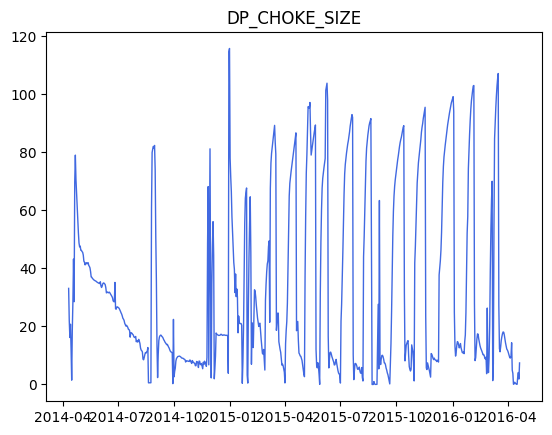

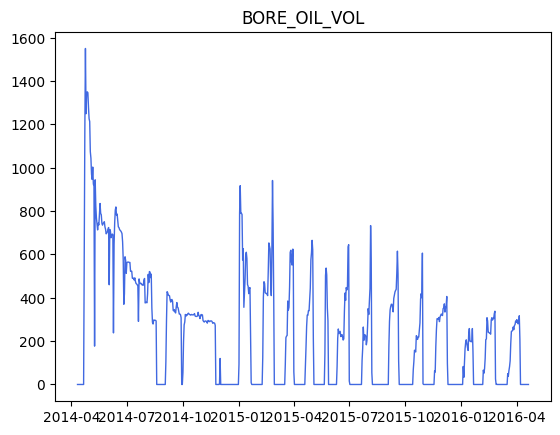

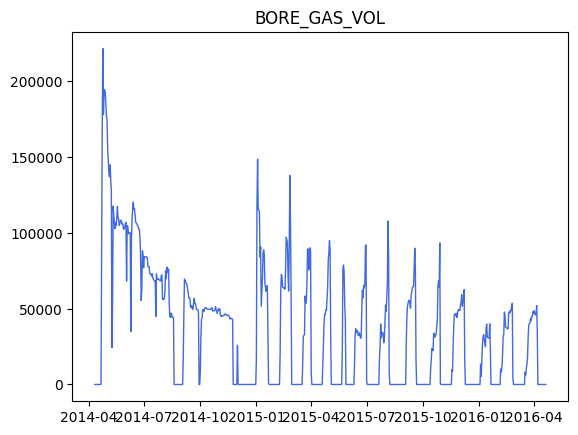

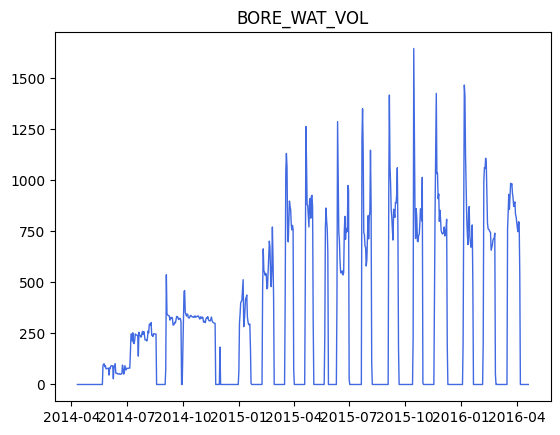

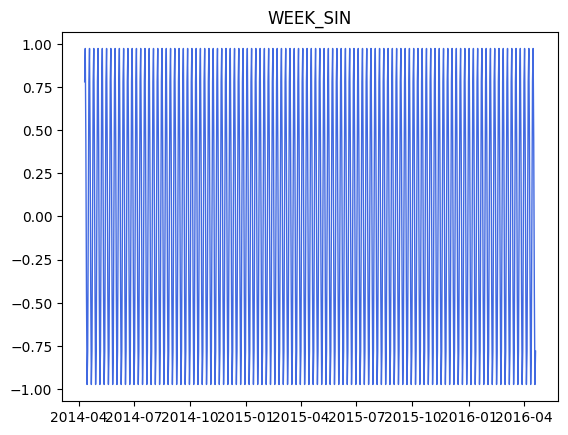

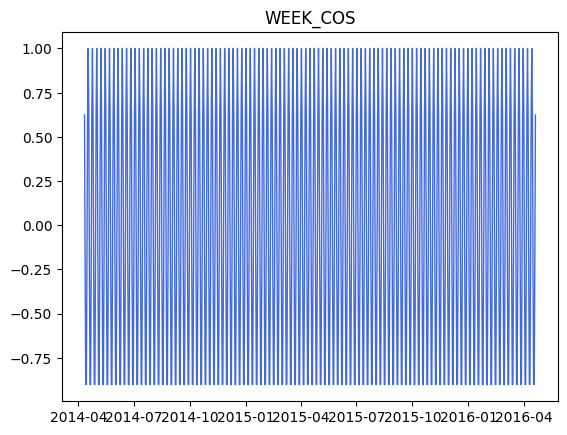

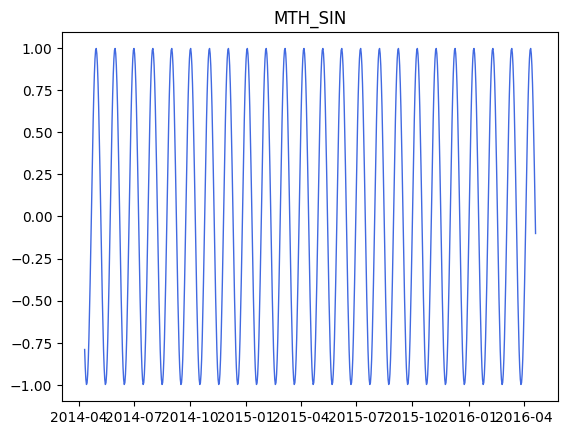

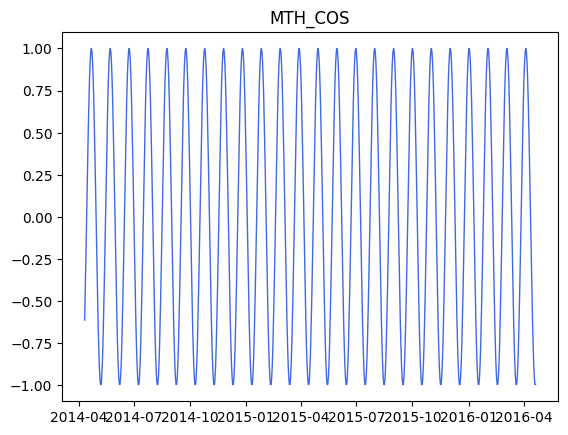

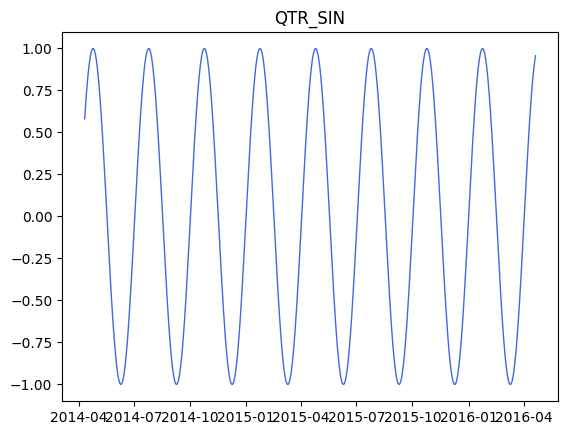

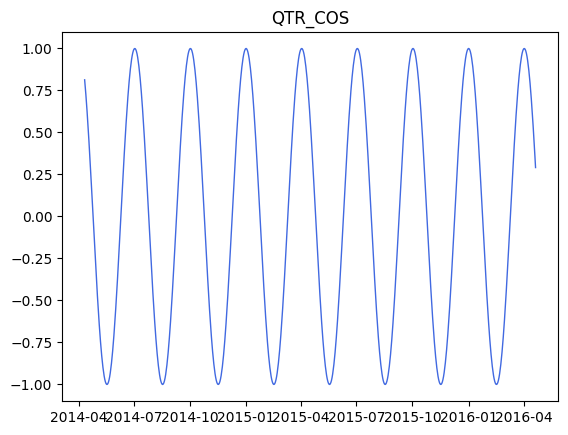

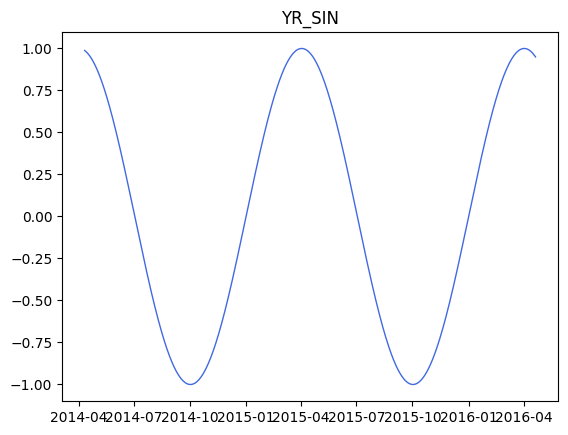

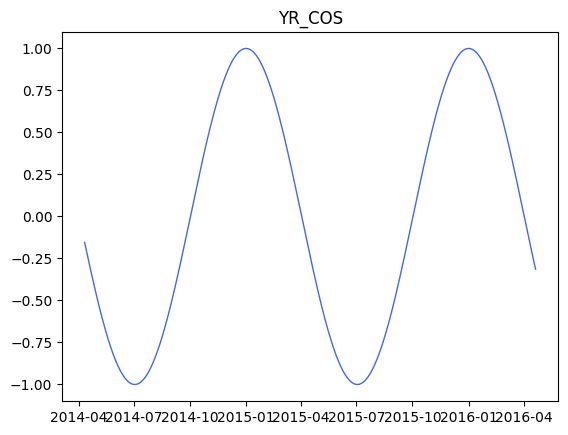

In [24]:

plot_start = 0
plot_end = len(well_df)
lw = 1

for col in well_df: 
    fig, ax = plt.subplots(1)
    ax.plot(well_df[col][plot_start : plot_end], color= 'royalblue', linewidth= lw)
    ax.set_title(f"{col}")


# Making a well_df clone WITHOUT SIN/COS
### So as not to care about it at ANOMALY DETECTION

In [25]:
well_df_nsc = well_df.drop(columns=well_df.columns[-sin_cos_col_amt:], axis=1)
well_df_nsc


,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
DATEPRD,,,,,,,,,,
2014-04-11,310.376,96.876,277.278,1.21599,33.098,10.480,33.072,0,0,0
2014-04-12,303.501,96.923,281.447,3.08702,22.053,8.704,22.053,0,0,0
2014-04-13,303.535,96.959,276.032,1.96237,27.503,9.423,16.163,0,0,0
2014-04-14,303.782,96.969,282.787,0.00000,20.996,8.131,20.737,0,0,0
2014-04-15,303.858,97.021,289.941,31.14186,13.918,8.498,12.182,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2016-04-16,266.148,101.170,257.473,0.00000,8.675,10.079,0.068,0,0,0
2016-04-17,270.268,101.198,263.770,0.00000,6.498,9.802,2.645,0,0,0
2016-04-18,276.869,101.231,263.155,0.00000,13.714,11.742,4.120,0,0,0


## Choosing input/output size

In [26]:

nr_rows = well_df.shape[0]
nr_cols = well_df.shape[1]
# nr_cols_nsc = well_df_nsc.shape[1]
input_size  = 60 # ~= 2 months
# output_size = 1

# print(f"Will predict {output_size} value ??") 
print(f"input == {input_size} rows by {nr_cols} cols")
# print(f"input == {input_size} rows by {nr_cols_nsc} cols for NO SIN COS")
print(f"nr rows = {nr_rows}")


input == 60 rows by 18 cols
nr rows = 741


## Split Timeseries into Train/Val/Test, sequentially

In [27]:
def make_tvt(df, train_ratio, val_ratio):
    train_end = int(train_ratio * nr_rows)
    val_end   = train_end + int(val_ratio * nr_rows)

        # split df
    train_set = df.iloc[:train_end]
    val_set   = df.iloc[train_end:val_end]
    test_set  = df.iloc[val_end:]

    return train_set, val_set, test_set


In [28]:

    # set ratios
train_ratio = 0.70
val_ratio   = 0.20
# test_ratio  will be what is left

    # split well_df
train_set, val_set, test_set = make_tvt(well_df, train_ratio, val_ratio)


    # verify split
print(f"Training set shape: {train_set.shape}")
print(f"Val set shape:      {val_set.shape}")
print(f"Test set shape:     {test_set.shape}")


Training set shape: (518, 18)
Val set shape:      (148, 18)
Test set shape:     (75, 18)


## Normalize the data
### Per TVT set

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
def scale_data(train_set, val_set, test_set):
    scaler  = MinMaxScaler()
    norm_train = scaler.fit_transform(train_set)
    norm_val   = scaler.transform(val_set)
    norm_test  = scaler.transform(test_set) 
    return scaler, norm_train, norm_val, norm_test


### Function for NO SIN COS sets
### So as to not predict anomalies in the time data; redundant

In [31]:
def drop_np_sin_cos_set(set): # ASSUMING THAT SIN COS ARE LAST
    # return set.drop(columns=set.columns[-sin_cos_col_amt:], axis=1)
    # return np.delete(set, -sin_cos_col_amt, axis=1)
    return np.delete(set, np.s_[-sin_cos_col_amt:], axis=1)


### Normalizing

In [32]:
scaler, norm_train, norm_val, norm_test = scale_data(train_set, val_set, test_set)
norm_train_nsc = drop_np_sin_cos_set(norm_train)
norm_val_nsc = drop_np_sin_cos_set(norm_val)
norm_test_nsc = drop_np_sin_cos_set(norm_test)

In [33]:
print(f"{norm_train.shape}, \t {type(norm_train)}")
print(f"{norm_val.shape}, \t {type(norm_val)}")
print(f"{norm_test.shape}, \t {type(norm_test)}")
print(f"{norm_train_nsc.shape}, \t {type(norm_train_nsc)}")
print(f"{norm_val_nsc.shape}, \t {type(norm_val_nsc)}")
print(f"{norm_test_nsc.shape}, \t {type(norm_test_nsc)}")

(518, 18), 	 <class 'numpy.ndarray'>
(148, 18), 	 <class 'numpy.ndarray'>
(75, 18), 	 <class 'numpy.ndarray'>
(518, 10), 	 <class 'numpy.ndarray'>
(148, 10), 	 <class 'numpy.ndarray'>
(75, 10), 	 <class 'numpy.ndarray'>


### Plotting to show that non-sincos columns are unaltered after creating NO SIN COS T/V/T
PLOTTING NORMALIZED DATA WITH AND WITHOUT SIN/COS

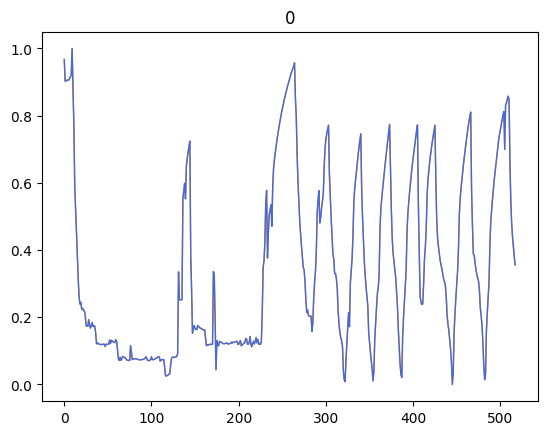

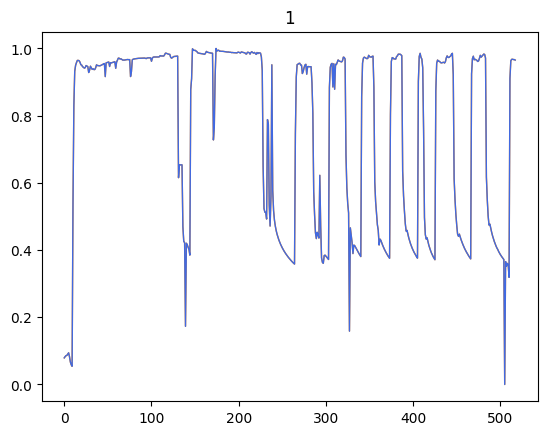

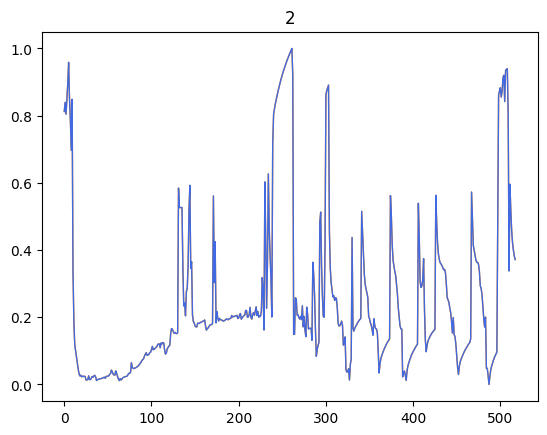

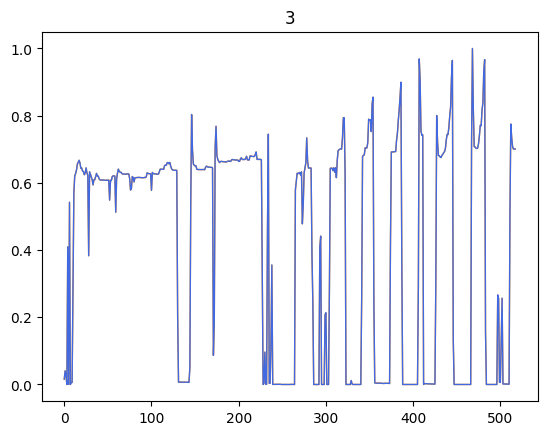

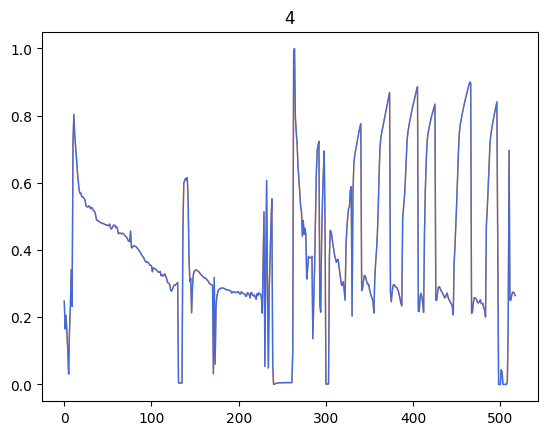

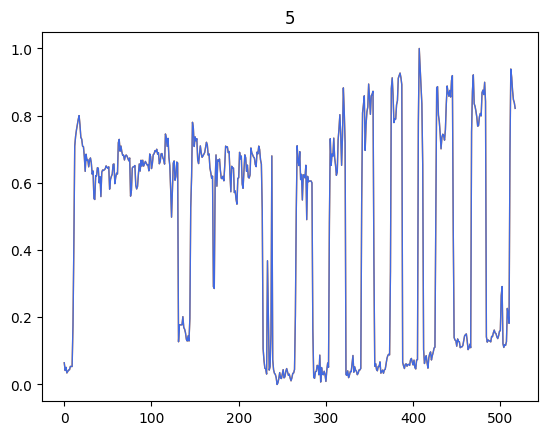

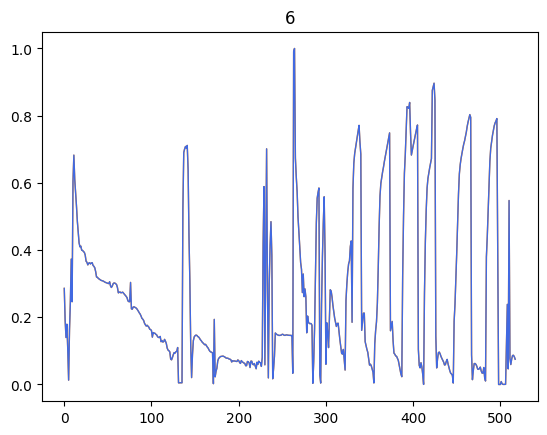

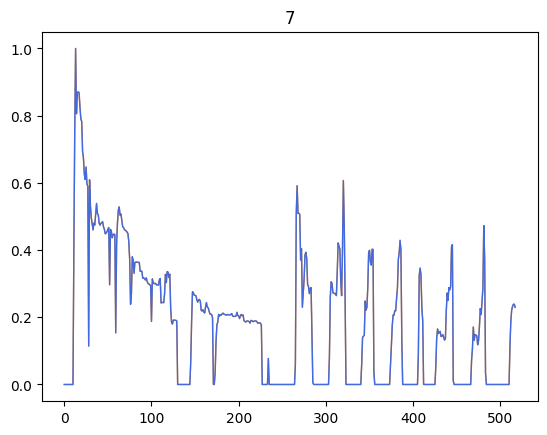

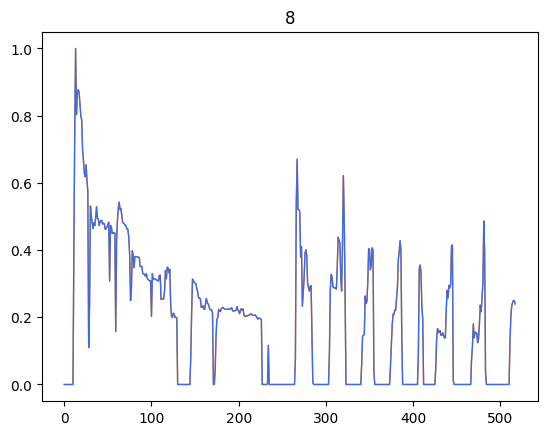

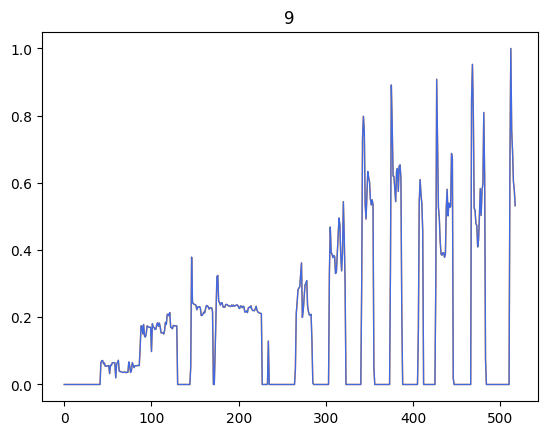

In [34]:
# norm_train
# norm_train_nsc
# norm_val
# norm_val_nsc
# norm_test
# norm_test_nsc
plot_start = 0
plot_end = 999999999
lw = 1
for col in range(norm_train_nsc.shape[1]): 
    fig, ax = plt.subplots(1)
    df_plot = pd.DataFrame(data={'orig': [arr[col] for arr in norm_train]
                                 , 'nsc':[arr[col] for arr in norm_train_nsc]})
    ax.plot(df_plot['orig'][plot_start : plot_end], color= 'darkorange', linewidth= lw)
    ax.plot(df_plot['nsc'][plot_start : plot_end], color= 'royalblue', linewidth= lw)
    ax.set_title(f"{col}")


## Choose a column to perform ANODET

In [35]:
print(f"Columns to predict in well_df for {well_name}\n (Excluding sin/cos cols):\n")
for col in well_df_nsc:
    print(col)


Columns to predict in well_df for NO 15/9-F-1 C
 (Excluding sin/cos cols):

AVG_DOWNHOLE_PRESSURE
AVG_DOWNHOLE_TEMPERATURE
AVG_DP_TUBING
AVG_CHOKE_SIZE_P
AVG_WHP_P
AVG_WHT_P
DP_CHOKE_SIZE
BORE_OIL_VOL
BORE_GAS_VOL
BORE_WAT_VOL


In [36]:
anodet_col = 'AVG_DOWNHOLE_PRESSURE'
anodet_col_nr = well_df.columns.get_loc(anodet_col)
print(anodet_col)
print(anodet_col_nr)


AVG_DOWNHOLE_PRESSURE
0


### Get the ANODET column


In [37]:
# def get_one_col_set(set, col_id):
#     col_arr = []
#     # for sub in set:
#     #     for sub_sub in sub:
#     #         col_arr.append(sub_sub[col_id])
#     print(len(col_arr))
#     return col_arr


### Plotting as a test

In [38]:

# plot_start = 0
# plot_end = 999999
# lw = 1

# fig, ax = plt.subplots(1)
# df_plot = pd.DataFrame(data={'orig': y_train})
# ax.plot(df_plot['orig'][plot_start : plot_end], color= 'darkorange', linewidth= lw)
# ax.set_title(f"{col}")


# Make features and labels 
### == X and Y

In [39]:
print([row for row in norm_train[0 : 2]])
# print([row[0] for row in norm_train[0 : 2]])
print(anodet_col)

[array([0.96722987, 0.07920165, 0.81249265, 0.01599252, 0.2477525 ,
       0.064488  , 0.28599348, 0.        , 0.        , 0.        ,
       0.90096887, 0.80193774, 0.104104  , 0.19187389, 0.79077754,
       0.9067631 , 0.99399713, 0.42272837]), array([0.90276788, 0.08292412, 0.83973211, 0.04060002, 0.16507601,
       0.04170942, 0.19070556, 0.        , 0.        , 0.        ,
       1.        , 0.35689587, 0.05052083, 0.27795062, 0.81805669,
       0.88580745, 0.99259485, 0.4142421 ])]
AVG_DOWNHOLE_PRESSURE


In [40]:

def make_x_y(set, set_nsc, in_width):
    print(f"\nCreating X, y ")
    X = []
    y = []

    set = np.asarray(set)             
    set_nsc = np.asarray(set_nsc)             

    for i in range(0, len(set) - in_width):
        if (i % 10 == 0) or (i == len(set) - in_width - 1):
            print(f"appending to X, y; i = {i}")

        X.append([row for row in set[i : i+in_width]]) 
        y.append([row[anodet_col_nr] for row in set[i : i+in_width]]) # ONLY WANTED ANODET COLUMN
        # y.append(get_one_col_set(set[i : i+in_width], anodet_col)) # ONLY WANTED ANODET COLUMN
        
    X = np.array(X)
    y = np.array(y)

    return X, y


### For T/V/T:

In [41]:
X_train, y_train = make_x_y(norm_train, norm_train_nsc, input_size)
X_val  , y_val   = make_x_y(norm_val  , norm_val_nsc  , input_size)
X_test , y_test  = make_x_y(norm_test , norm_test_nsc , input_size)


Creating X, y 
appending to X, y; i = 0
appending to X, y; i = 10
appending to X, y; i = 20
appending to X, y; i = 30
appending to X, y; i = 40
appending to X, y; i = 50
appending to X, y; i = 60
appending to X, y; i = 70
appending to X, y; i = 80
appending to X, y; i = 90
appending to X, y; i = 100
appending to X, y; i = 110
appending to X, y; i = 120
appending to X, y; i = 130
appending to X, y; i = 140
appending to X, y; i = 150
appending to X, y; i = 160
appending to X, y; i = 170
appending to X, y; i = 180
appending to X, y; i = 190
appending to X, y; i = 200
appending to X, y; i = 210
appending to X, y; i = 220
appending to X, y; i = 230
appending to X, y; i = 240
appending to X, y; i = 250
appending to X, y; i = 260
appending to X, y; i = 270
appending to X, y; i = 280
appending to X, y; i = 290
appending to X, y; i = 300
appending to X, y; i = 310
appending to X, y; i = 320
appending to X, y; i = 330
appending to X, y; i = 340
appending to X, y; i = 350
appending to X, y; i = 

In [42]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(458, 60, 18)
(88, 60, 18)
(15, 60, 18)
(458, 60)
(88, 60)
(15, 60)


# MODEL

In [43]:
from keras.models import Sequential, Model
from keras.layers import InputLayer, Input, Conv1D, MaxPooling1D, Flatten, Dense, concatenate, LSTM, Dropout, AveragePooling1D
from keras.losses import MeanSquaredError
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.metrics import RootMeanSquaredError


## Model definition



In [44]:

# input size already defined
in_out_size = input_size 
input_cols = X_train.shape[2]

print(input_size)
print(in_out_size)
print(input_cols)

60
60
18


### Hypertuning version

In [45]:

# def hyptun_model(hp):
#     model = Sequential()
#     model.add(InputLayer((input_size, nr_cols)))
#     model.add(Conv1D(filters=hp.Int('conv1d_1_filters', min_value=32, max_value=128, step=32),
#                      kernel_size=hp.Int('conv1d_1_kernel_size', min_value=1, max_value=3, step=1),
#                      strides=1,
#                      activation='relu'))
#     model.add(Conv1D(filters=hp.Int('conv1d_2_filters', min_value=32, max_value=128, step=32),
#                      kernel_size=hp.Int('conv1d_2_kernel_size', min_value=1, max_value=3, step=1),
#                      strides=1,
#                      activation='relu'))
#     if hp.Choice('use_extra_conv1d_layer', values=[0, 1]):
#         model.add(Conv1D(filters=hp.Int('conv1d_3_filters', min_value=32, max_value=128, step=32),
#                          kernel_size=hp.Int('conv1d_3_kernel_size', min_value=1, max_value=3, step=1),
#                          strides=1,
#                          activation='relu'))
#     model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.25)))
#     if hp.Choice('use_extra_extra_conv1d_layer', values=[0, 1]):
#         model.add(Conv1D(filters=hp.Int('conv1d_4_filters', min_value=32, max_value=128, step=32),
#                         kernel_size=hp.Int('conv1d_4_kernel_size', min_value=1, max_value=3, step=1),
#                         strides=1,
#                         activation='relu'))

#     hp_pool = hp.Choice('pooling', values=['max', 'avg'])
#     if hp_pool == 'max':
#         model.add(MaxPooling1D())
#     else: # => avg
#         model.add(AveragePooling1D())

#     # if hp.Choice('use_extra_lstm_layer', values=[0, 1]):
#     #     model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32)))
#     model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32)))
#     model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.25)))
#     model.add(Dense(output_width, activation='relu'))

#     model.compile(optimizer= Adam(hp.Float('learning_rate', min_value= 1e-5, max_value= 1e-2, sampling= 'LOG')),
#                   loss= 'mean_squared_error',
#                   metrics= ['mean_absolute_error'])

#     return model



### Manual hyperparameters version

In [46]:

lr = 0.0001
drop = 0.1

def make_model(in_out_size, nr_cols_in, dropout):

    model = Sequential()
    model.add(InputLayer((in_out_size, nr_cols_in)))
    model.add(Conv1D(64, kernel_size=1, strides=1, activation='relu'))
    model.add(Conv1D(64, kernel_size=1, strides=1, activation='relu'))
    model.add(MaxPooling1D())
    model.add(LSTM(64))
    model.add(Dropout(dropout))
    model.add(Dense(in_out_size, activation='relu'))

    return model

    # Model
model = make_model(in_out_size, input_cols, drop)
model.compile(loss= MeanSquaredError()
                     , optimizer= Adam(learning_rate= lr)
                     , metrics= [RootMeanSquaredError()])

# checkpoint = ModelCheckpoint('model/', save_best_only=True)
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


## Hypertuning


## Fitting

In [48]:

model.fit(X_train
         , y_train
         , validation_data=(X_val, y_val)
         , epochs=100
      #    , callbacks=[checkpoint, callback]
         , shuffle=False
      #    , batch_size=10
         )


Epoch 1/100
15/15 [==============================] - 0s 12ms/step - loss: 0.0867 - root_mean_squared_error: 0.2945 - val_loss: 0.1112 - val_root_mean_squared_error: 0.3335
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0841 - root_mean_squared_error: 0.2900 - val_loss: 0.1076 - val_root_mean_squared_error: 0.3280
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0823 - root_mean_squared_error: 0.2869 - val_loss: 0.1042 - val_root_mean_squared_error: 0.3228
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0807 - root_mean_squared_error: 0.2840 - val_loss: 0.1017 - val_root_mean_squared_error: 0.3189
Epoch 5/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0788 - root_mean_squared_error: 0.2806 - val_loss: 0.0996 - val_root_mean_squared_error: 0.3155
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.0765 - root_mean_squared_error: 0.2765 - val_loss: 0.0975 - val_

## Plotting